***(https://www.kaggle.com/code/sandragracenelson/titanic-dataset-prediction/input?select=gender_submission.csv)***

## Get Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

## 𝗗𝗮𝘁𝗮 𝗣𝗿𝗲𝗽𝗮𝗿𝗮𝘁𝗶𝗼𝗻:
### 𝗔. 𝗨𝗻𝗱𝗲𝗿𝘀𝘁𝗮𝗻𝗱𝗶𝗻𝗴 𝘆𝗼𝘂𝗿 𝗗𝗮𝘁𝗮:

#### How big is the data ?

In [3]:
df.shape

(891, 12)

#### How does the data look like ?

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
404,405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S


#### What are the data types of columns ?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Are there any missing values ?

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### How does the data look mathematically ?

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Are there duplicate values in data (rows)?

In [9]:
df.duplicated().sum()

0

#### How is the correlation between cols ?

In [10]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
# correlation coefficient for specific column.
df.corr(numeric_only=True)['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

### 𝗕. 𝗘𝗗𝗔 (Exploratory Data Analysis):

#### Univariate Analysis for categorical data ***(Survived, Pclass, Sex)***

<Axes: >

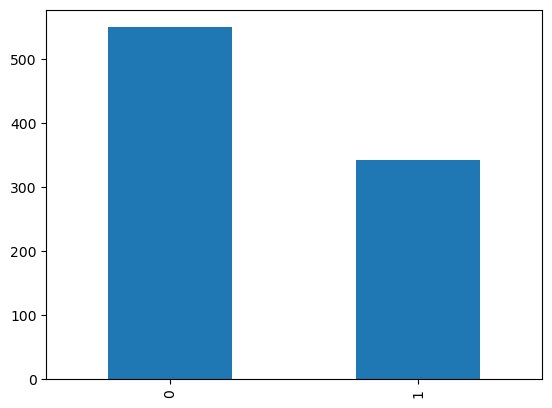

In [12]:
# draw a count plot here to get the frequency of each categories in 'Survived' column using seaborn.

#count plot
df['Survived'].value_counts().plot(kind = 'bar')

In [ ]:
# You can also do the same thing by below code as well

<Axes: xlabel='Survived', ylabel='count'>

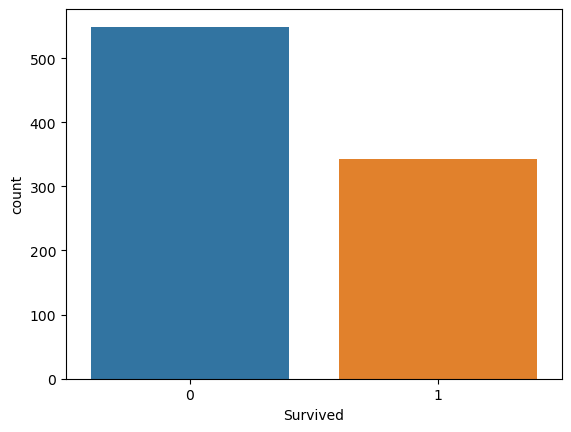

In [13]:
import seaborn as sns

sns.countplot(x=df['Survived'], dodge=False)

In [ ]:
# draw a count plot here to get the frequency of each categories in 'Pclass' column using pie chart

<Axes: ylabel='Pclass'>

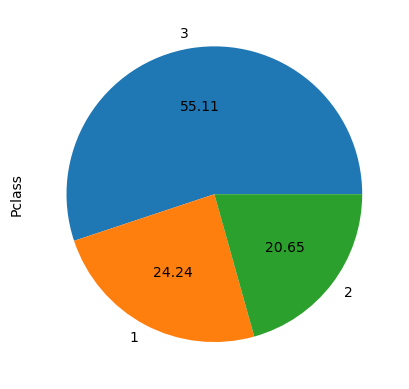

In [14]:
df['Pclass'].value_counts().plot(kind = 'pie', autopct='%.2f')

In [ ]:
# draw a count plot here to get the frequency of each categories in 'sex' column using bar chart

<Axes: >

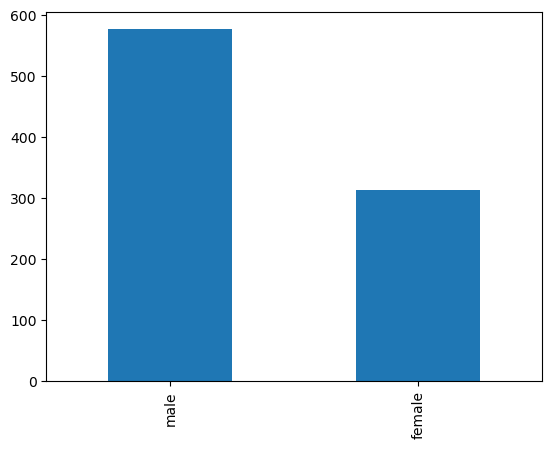

In [15]:
df['Sex'].value_counts().plot(kind='bar')

#### Univariate Analysis for numerical data

In [ ]:
# Now let’s see how can we plot graphs for numerical data columns as well

In [ ]:
# Histogram

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

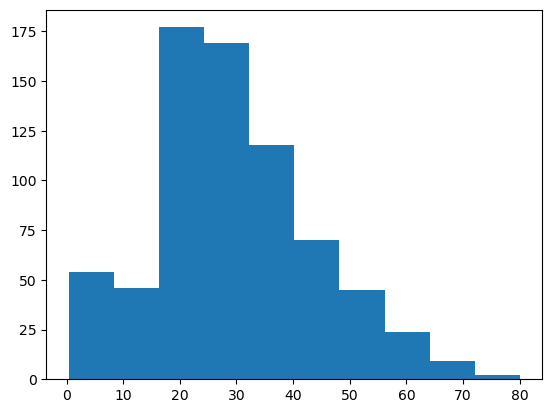

In [16]:
# Display the frequency or count of data points falling within specified intervals or bins.

import matplotlib.pyplot as plt

plt.hist(df['Age'])

In [ ]:
# Boxplot for same thing.

# It includes the minimum, maximum, median, and quartiles, as well as any potential outliers in the data.

<Axes: >

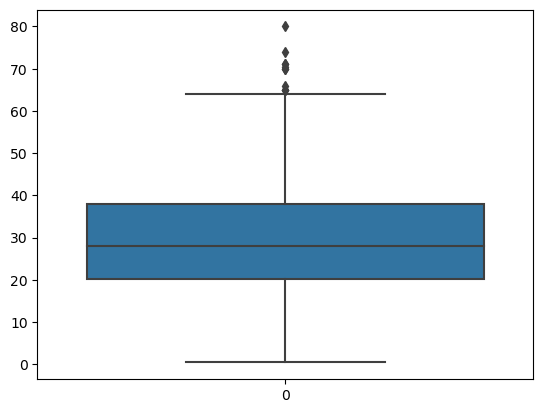

In [17]:
sns.boxplot(df['Age'])

In [18]:
df['Age'].min()

0.42

In [19]:
df['Age'].max()

80.0

In [20]:
df['Age'].mean()

29.69911764705882

In [21]:
# It indicates whether the data is skewed to the left (negative skewness), to the right (positive skewness),
# or symmetrically distributed around the mean (skewness close to zero).
df['Age'].skew()

0.38910778230082704

In [22]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C


#### Bivariate and Multivariate Analysis

<Axes: xlabel='Age', ylabel='Fare'>

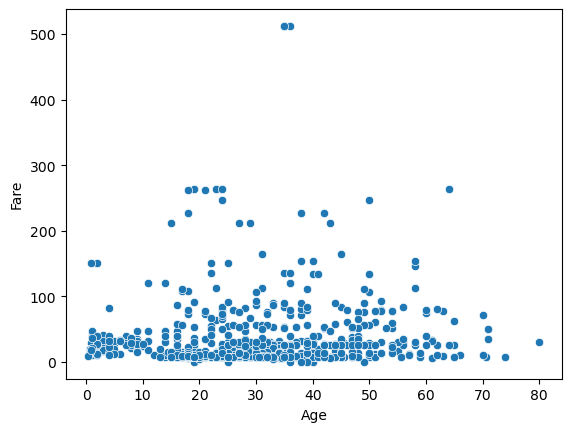

In [23]:
#  Scatterplot (Numerical – Numerical)

sns.scatterplot(x=df['Age'], y=df['Fare'])

In [ ]:
# You can extent it to multivariate by passing more parameters of variable like below.

<Axes: xlabel='Age', ylabel='Fare'>

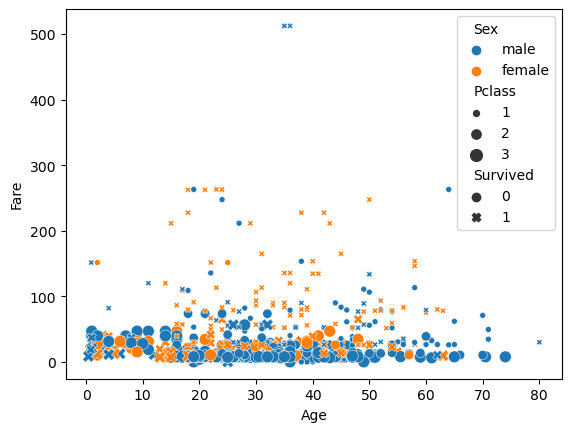

In [24]:
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Sex'], style=df['Survived'], size=df['Pclass'])

In [ ]:
# Bar Plot (Numerical – Categorical)

<Axes: xlabel='Pclass', ylabel='Age'>

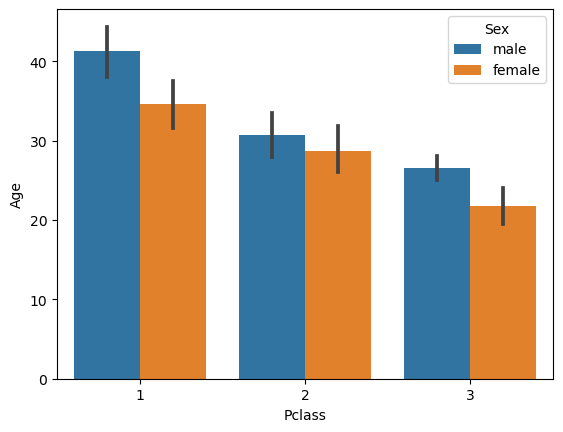

In [25]:
sns.barplot(x=df['Pclass'], y=df['Age'], hue=df['Sex'])

In [ ]:
# Box Plot (Numerical – Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

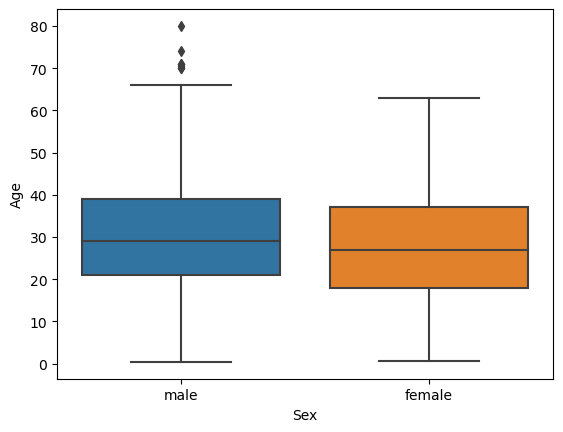

In [26]:
# graph between male and female where you will find some outliers as well.

# It shows minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.
sns.boxplot(x=df['Sex'], y=df['Age'])

In [ ]:
# histplot (Numerical – Categorical)

<Axes: xlabel='Age', ylabel='Count'>

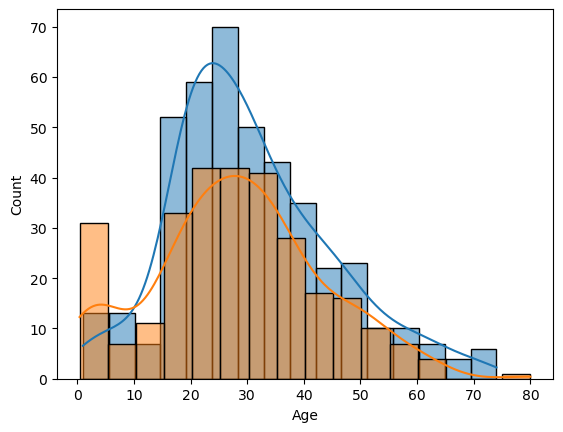

In [27]:
sns.histplot(df[df['Survived']==0]['Age'], kde=True)
sns.histplot(df[df['Survived']==1]['Age'], kde=True)

In [28]:
# in above graph that they tried to save young kids, 
# that’s why survival probability of young kids are little more compare to older ones.

In [29]:
# HeatMap (Categorical – Categorical)

<Axes: xlabel='Survived', ylabel='Pclass'>

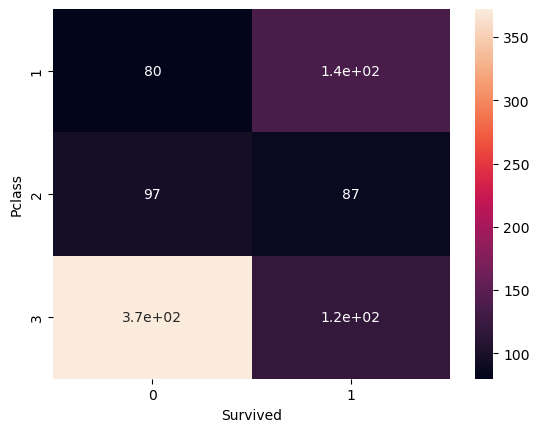

In [30]:
# Let’s say if we wanna find out in each Pclass how many people survived and how many did not.

sns.heatmap(pd.crosstab(df['Pclass'],df['Survived']), annot=True)

In [31]:
# The below code is calculation percentage of survival of each class.

(df.groupby(['Embarked']).mean()['Survived']*100)

C:\Users\TEKAM\AppData\Local\Temp\ipykernel_31760\3711903131.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (df.groupby(['Embarked']).mean()['Survived']*100)


Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

In [32]:
df.shape

(891, 12)

### 𝗖. 𝗙𝗲𝗮𝘁𝘂𝗿𝗲 𝗘𝗻𝗴𝗶𝗻𝗲𝗲𝗿𝗶𝗻𝗴:

#### 𝟭. 𝗙𝗲𝗮𝘁𝘂𝗿𝗲 𝗧𝗿𝗮𝗻𝘀𝗳𝗼𝗿𝗺𝗮𝘁𝗶𝗼𝗻

##### 𝘢. 𝘔𝘪𝘴𝘴𝘪𝘯𝘨 𝘝𝘢𝘭𝘶𝘦 𝘐𝘮𝘱𝘶𝘵𝘢𝘵𝘪𝘰𝘯: (Try any of the following methods)

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# a.1 Drop missing rows (CCA complete case analysis)

# df = df.dropna()

In [ ]:
# b.2 Impute values with Univariate & Multivariate:

In [ ]:
# Impute missing values with mean:

# df = df.fillna(df.mean())

In [34]:
# Impute missing values with median:
# this method is useful when the variable has outliers or a skewed distribution that might affect the mean imputation.

df['Age'] = df['Age'].fillna(df['Age'].median())

In [36]:
# Impute missing values with mode:
# the most frequently occurring value, of the respective variable. 
# This method is suitable for categorical or discrete variables.

df['Embarked'] = df['Embarked'] .fillna(df['Embarked'].mode().iloc[0])

In [37]:
# remove the unnecessary cabin column:

df = df.drop(columns=['Cabin'])

In [38]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
df.shape

(891, 11)

##### 𝘏𝘢𝘯𝘥𝘭𝘪𝘯𝘨 𝘊𝘢𝘵𝘦𝘨𝘰𝘳𝘪𝘤𝘢𝘭 𝘍𝘦𝘢𝘵𝘶𝘳𝘦𝘴(𝘕𝘶𝘮𝘦𝘳𝘪𝘤𝘢𝘭 𝘢𝘯𝘥 𝘊𝘢𝘵𝘦𝘨𝘰𝘳𝘪𝘤𝘢𝘭)

In [ ]:
# Label Encoding:

# Label encoding assigns a unique numeric label to each category in a categorical variable.
# Apply label encoding to the 'Embarked' column
# Initialize LabelEncoder

# Uncomment the below code to use it.

# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df = label_encoder.fit_transform(df['Embarked'])

In [ ]:
# OR  we can do this using below method as well.
# on columns 'Sex', 'Embarked'

In [40]:
#Converting the categorical features 'Sex' and 'Embarked' into numerical values 0 & 1

df.Sex=df.Sex.map({'female':0, 'male':1})
df.Embarked=df.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


##### 𝘤. 𝘖𝘶𝘵𝘭𝘪𝘦𝘳 𝘋𝘦𝘵𝘦𝘤𝘵𝘪𝘰𝘯

In [ ]:
# Percentile Approach on 'Age' column:

In [41]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

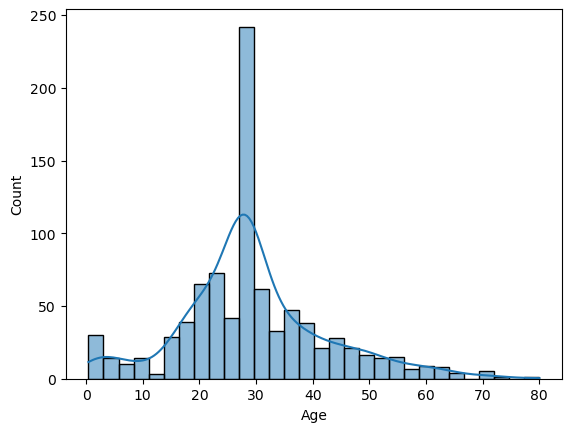

In [42]:
sns.histplot(df["Age"], kde=True)

In [ ]:
df

<Axes: xlabel='Age'>

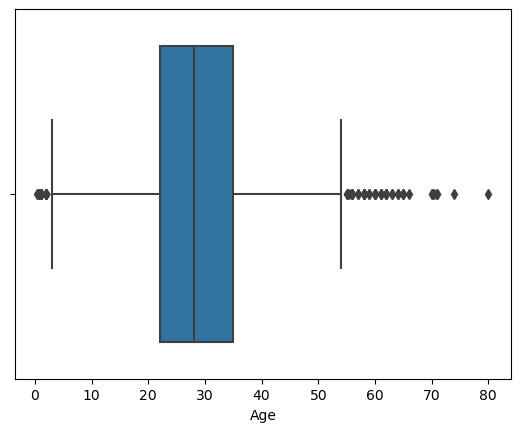

In [43]:
sns.boxplot(x=df["Age"])

In [ ]:
# There are outliers on both the sides, upper and lowwer whiskers.
# So, lets define upper and lower threshold for our 'Age' column.

In [44]:
upper_limit = df['Age'].quantile(0.95)
upper_limit

54.0

In [45]:
lower_limit = df['Age'].quantile(0.05)
lower_limit

6.0

In [46]:
# now see the outlier data for 'Age' column looks like below:

df[(df['Age'] >= upper_limit) | (df['Age'] <= lower_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.00,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.00,3,1,349909,21.0750,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.00,1,1,PP 9549,16.7000,0
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.00,0,0,113783,26.5500,0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",0,55.00,0,0,248706,16.0000,0
...,...,...,...,...,...,...,...,...,...,...,...
831,832,1,2,"Richards, Master. George Sibley",1,0.83,1,1,29106,18.7500,0
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",1,4.00,4,2,347082,31.2750,0
851,852,0,3,"Svensson, Mr. Johan",1,74.00,0,0,347060,7.7750,0
869,870,1,3,"Johnson, Master. Harold Theodor",1,4.00,1,1,347742,11.1333,0


In [47]:
# So, our new dataframe after outlier removal will be:

df = df[(df['Age'] <= upper_limit) & (df['Age'] >= lower_limit)]
df.shape

(805, 11)

<Axes: xlabel='Age', ylabel='Count'>

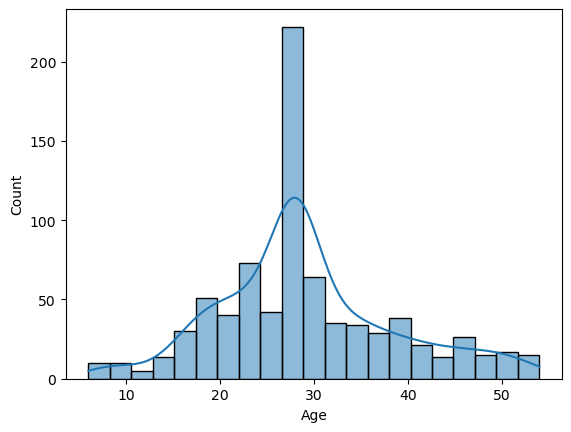

In [48]:
# See the distribution now:
sns.histplot(df["Age"], kde=True)

<Axes: xlabel='Age'>

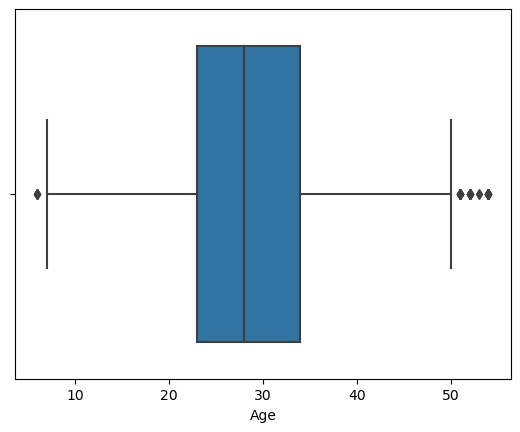

In [49]:
sns.boxplot(x=df["Age"])

##### 𝘥. 𝘍𝘦𝘢𝘵𝘶𝘳𝘦 𝘚𝘤𝘢𝘭𝘪𝘯𝘨

In [ ]:
# We need to scale our independent(input) variables.

In [50]:
new_df = df[['Age', 'Fare']]
new_df

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


In [51]:
new_df.shape

(805, 2)

In [52]:
# Lets use Standerdization on 'Age' & 'Fare' columns,

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the dataframe.
scaler.fit(new_df)

# transform dataframe
df1 = scaler.transform(new_df)

In [53]:
df1

array([[-0.74880599, -0.48222556],
       [ 0.93232023,  0.78620948],
       [-0.32852443, -0.4688545 ],
       ...,
       [-0.11838366, -0.16131991],
       [-0.32852443, -0.03157103],
       [ 0.3018979 , -0.47232107]])

In [54]:
df_scaled = pd.DataFrame(df1, columns=new_df.columns)

In [55]:
df_scaled

,Age,Fare
0,-0.748806,-0.482226
1,0.932320,0.786209
2,-0.328524,-0.468854
3,0.617109,0.426017
4,0.617109,-0.466378
...,...,...
800,-0.223454,-0.368324
801,-1.064017,-0.031571
802,-0.118384,-0.161320
803,-0.328524,-0.031571


In [ ]:
# now concatenate the new dataframe df_scaled with original dataframe.

In [56]:
# Concatenate along columns
df = pd.concat([df, df_scaled], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age,Fare
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,0,-0.748806,-0.482226
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,1,0.932320,0.786209
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,0,-0.328524,-0.468854
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,0,0.617109,0.426017
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,0,0.617109,-0.466378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.118384,-0.466378
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.667813,2.640002
777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.853876,-0.398037
788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.877954,-0.447560


In [59]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age            0
Fare           0
dtype: int64

In [58]:
df = df.dropna()

##### 𝟮. 𝗙𝗲𝗮𝘁𝘂𝗿𝗲 𝗖𝗼𝗻𝘀𝘁𝗿𝘂𝗰𝘁𝗶𝗼𝗻:

In [ ]:
## Applying Feature Contruction first. means combine two or more columns into one.
# Applying it on 'SibSp' and 'Parch' columns.

In [60]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age,Fare
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,0,-0.748806,-0.482226
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,1,0.932320,0.786209
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,0,-0.328524,-0.468854
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,0,0.617109,0.426017
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,0,0.617109,-0.466378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,800.0,0.0,3.0,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",0.0,30.0,1.0,1.0,345773,24.1500,0,1.037391,-0.048904
800,801.0,0.0,2.0,"Ponesell, Mr. Martin",1.0,34.0,0.0,0.0,250647,13.0000,0,-0.223454,-0.368324
801,802.0,1.0,2.0,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",0.0,31.0,1.0,1.0,C.A. 31921,26.2500,0,-1.064017,-0.031571
802,803.0,1.0,1.0,"Carter, Master. William Thornton II",1.0,11.0,1.0,2.0,113760,120.0000,0,-0.118384,-0.161320


In [61]:
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

C:\Users\TEKAM\AppData\Local\Temp\ipykernel_31760\1106059098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family_size'] = df['SibSp'] + df['Parch'] + 1


In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age,Fare,Family_size
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,0,-0.748806,-0.482226,2.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,1,0.932320,0.786209,2.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,0,-0.328524,-0.468854,1.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,0,0.617109,0.426017,2.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,0,0.617109,-0.466378,1.0


In [64]:
def myfunc(num):
    if num == 1:
        # alon
        return 0
    elif num > 1 and num <=4:
        # small family
        return 1
    else:
        # large family
        return 2

In [65]:
df['Family_type'] = df['Family_size'].apply(myfunc)

C:\Users\TEKAM\AppData\Local\Temp\ipykernel_31760\349818290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family_type'] = df['Family_size'].apply(myfunc)


In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age,Fare,Family_size,Family_type
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,0,-0.748806,-0.482226,2.0,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,1,0.932320,0.786209,2.0,1
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,0,-0.328524,-0.468854,1.0,0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,0,0.617109,0.426017,2.0,1
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,0,0.617109,-0.466378,1.0,0


In [67]:
df.drop(columns=['SibSp', 'Parch', 'Family_size'], inplace=True)

C:\Users\TEKAM\AppData\Local\Temp\ipykernel_31760\4031850121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['SibSp', 'Parch', 'Family_size'], inplace=True)


In [ ]:
# now in above code, we have droped these three columns 'SibSp', 'Parch', 'Family_size'

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Age,Fare,Family_type
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,A/5 21171,7.2500,0,-0.748806,-0.482226,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,PC 17599,71.2833,1,0.932320,0.786209,1
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,STON/O2. 3101282,7.9250,0,-0.328524,-0.468854,0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,113803,53.1000,0,0.617109,0.426017,1
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,373450,8.0500,0,0.617109,-0.466378,0


In [ ]:
## Feature splitting:

In [69]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
799    Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...
800                                 Ponesell, Mr. Martin
801          Collyer, Mrs. Harvey (Charlotte Annie Tate)
802                  Carter, Master. William Thornton II
804                              Hedman, Mr. Oskar Arvid
Name: Name, Length: 727, dtype: object

In [70]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

C:\Users\TEKAM\AppData\Local\Temp\ipykernel_31760\2601922921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]


In [71]:
df[['Title', 'Name']]

,Title,Name
0,Mr,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr,"Allen, Mr. William Henry"
...,...,...
799,Mrs,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go..."
800,Mr,"Ponesell, Mr. Martin"
801,Mrs,"Collyer, Mrs. Harvey (Charlotte Annie Tate)"
802,Master,"Carter, Master. William Thornton II"


In [72]:
# now run some analysis on these splitted columns like below:

(df.groupby('Title').mean()['Survived']).sort_values(ascending=False)

C:\Users\TEKAM\AppData\Local\Temp\ipykernel_31760\2564543932.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (df.groupby('Title').mean()['Survived']).sort_values(ascending=False)


Title
Lady            1.000000
Mlle            1.000000
Mme             1.000000
Ms              1.000000
Sir             1.000000
the Countess    1.000000
Mrs             0.776699
Miss            0.703448
Major           0.500000
Master          0.500000
Dr              0.428571
Mr              0.162528
Don             0.000000
Rev             0.000000
Name: Survived, dtype: float64

In [ ]:
# By doing above analysis, we can say that there are high survival rate in titles like (Mrs, Miss, Major)

In [73]:
#Cleaning the data by removing irrelevant columns

df=df.drop(['Name','Ticket'], axis=1)

In [74]:
# Drop the first occurrence of the duplicate column 'Age', 'Fare'

df = df.loc[:, ~df.columns.duplicated(keep='last')]

In [75]:
df

,PassengerId,Survived,Pclass,Sex,Embarked,Age,Fare,Family_type,Title
0,1.0,0.0,3.0,1.0,0,-0.748806,-0.482226,1,Mr
1,2.0,1.0,1.0,0.0,1,0.932320,0.786209,1,Mrs
2,3.0,1.0,3.0,0.0,0,-0.328524,-0.468854,0,Miss
3,4.0,1.0,1.0,0.0,0,0.617109,0.426017,1,Mrs
4,5.0,0.0,3.0,1.0,0,0.617109,-0.466378,0,Mr
...,...,...,...,...,...,...,...,...,...
799,800.0,0.0,3.0,0.0,0,1.037391,-0.048904,1,Mrs
800,801.0,0.0,2.0,1.0,0,-0.223454,-0.368324,0,Mr
801,802.0,1.0,2.0,0.0,0,-1.064017,-0.031571,1,Mrs
802,803.0,1.0,1.0,1.0,0,-0.118384,-0.161320,1,Master


##### 𝟯. 𝗗𝗶𝗺𝗲𝗻𝘀𝗶𝗼𝗻𝗮𝗹𝗶𝘁𝘆 𝗥𝗲𝗱𝘂𝗰𝘁𝗶𝗼𝗻:

In [ ]:
# Feature Selection is a technique that can be perform after model building as well.
# because, by selecting particular feature we can decide whether it affects the model performance.

In [ ]:
# So thats why, we will first see Feature Extraction technique using PCA algo.

In [ ]:
# Here i am skipping these steps now. You can do this if you want in future.

### Creating model (𝗠𝗼𝗱𝗲𝗹𝗶𝗻𝗴):

In [76]:
df

,PassengerId,Survived,Pclass,Sex,Embarked,Age,Fare,Family_type,Title
0,1.0,0.0,3.0,1.0,0,-0.748806,-0.482226,1,Mr
1,2.0,1.0,1.0,0.0,1,0.932320,0.786209,1,Mrs
2,3.0,1.0,3.0,0.0,0,-0.328524,-0.468854,0,Miss
3,4.0,1.0,1.0,0.0,0,0.617109,0.426017,1,Mrs
4,5.0,0.0,3.0,1.0,0,0.617109,-0.466378,0,Mr
...,...,...,...,...,...,...,...,...,...
799,800.0,0.0,3.0,0.0,0,1.037391,-0.048904,1,Mrs
800,801.0,0.0,2.0,1.0,0,-0.223454,-0.368324,0,Mr
801,802.0,1.0,2.0,0.0,0,-1.064017,-0.031571,1,Mrs
802,803.0,1.0,1.0,1.0,0,-0.118384,-0.161320,1,Master


In [77]:
#Cleaning the data by removing 'Title' column. We created it only for indivisual analysis.

df=df.drop(['Title'], axis=1)

In [ ]:
# df = df.dropna()

In [78]:
df.shape

(727, 8)

In [79]:
# Splitting the data for training and testing using train-test-split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Survived'], axis=1),
    df.Survived,
    test_size= 0.2,
    random_state=0,
    stratify=df.Survived)

#### Using Logistic Regression:

In [80]:
from sklearn.linear_model import LogisticRegression

lrmod = LogisticRegression()
lrmod.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lrmod.predict(X_test)
accuracy_score(y_test, y_predict)

F:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8356164383561644

In [81]:
df

,PassengerId,Survived,Pclass,Sex,Embarked,Age,Fare,Family_type
0,1.0,0.0,3.0,1.0,0,-0.748806,-0.482226,1
1,2.0,1.0,1.0,0.0,1,0.932320,0.786209,1
2,3.0,1.0,3.0,0.0,0,-0.328524,-0.468854,0
3,4.0,1.0,1.0,0.0,0,0.617109,0.426017,1
4,5.0,0.0,3.0,1.0,0,0.617109,-0.466378,0
...,...,...,...,...,...,...,...,...
799,800.0,0.0,3.0,0.0,0,1.037391,-0.048904,1
800,801.0,0.0,2.0,1.0,0,-0.223454,-0.368324,0
801,802.0,1.0,2.0,0.0,0,-1.064017,-0.031571,1
802,803.0,1.0,1.0,1.0,0,-0.118384,-0.161320,1


<Axes: >

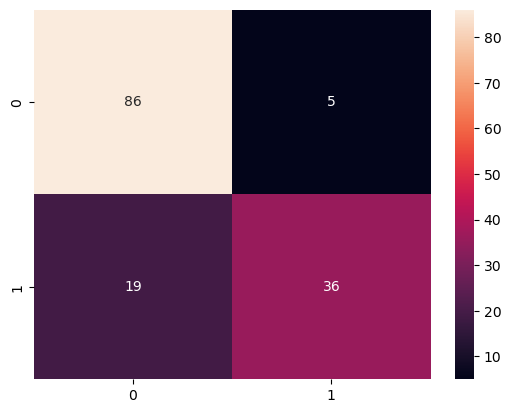

In [82]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

cma=confusion_matrix(y_test, y_predict)
sns.heatmap(cma,annot=True)

### Processing test data:

In [83]:
test = pd.read_csv('test.csv')

In [84]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Prediction

In [85]:
# For prediction repeate all the steps for test dataset again.

In [86]:
test['Age'] = test['Age'].fillna(test['Age'].median())

In [87]:
test['Embarked'] = test['Embarked'] .fillna(test['Embarked'] .mode().iloc[0])

In [88]:
test = test.drop(columns=['Cabin'])

In [89]:
test.Sex=test.Sex.map({'female':0, 'male':1})
test.Embarked=test.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})

In [90]:
upper_limit_test = test['Age'].quantile(0.95)
lower_limit_test = test['Age'].quantile(0.05)

test = test[(test['Age'] <= upper_limit_test) & (test['Age'] >= lower_limit_test)]
test.shape

(379, 10)

In [91]:
new_df_test = test[['Age', 'Fare']]

# Lets use Standerdization on 'Age' & 'Fare' columns,

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the dataframe.
scaler.fit(new_df_test)

# transform dataframe
df1_test = scaler.transform(new_df_test)

In [92]:
df_scaled_test = pd.DataFrame(df1_test, columns=new_df.columns)

In [93]:
test = pd.concat([test, df_scaled_test], axis=1)

In [94]:
test = test.dropna()

In [95]:
test['Family_size'] = test['SibSp'] + test['Parch'] + 1

In [96]:
test['Family_type'] = test['Family_size'].apply(myfunc)

In [97]:
test.drop(columns=['SibSp', 'Parch', 'Family_size'], inplace=True)

In [98]:
test=test.drop(['Name','Ticket'], axis=1)

In [99]:
test = test.loc[:, ~test.columns.duplicated(keep='last')]

In [ ]:
# test = test.dropna()

In [100]:
test

,PassengerId,Pclass,Sex,Embarked,Age,Fare,Family_type
0,892.0,3.0,1.0,2,0.545728,-0.510435,0
1,893.0,3.0,0.0,0,1.869192,-0.528042,1
3,895.0,3.0,1.0,0,-0.777736,-0.415764,0
4,896.0,3.0,0.0,0,-1.624753,-0.480795,1
5,897.0,3.0,1.0,0,0.069281,-0.514682,0
...,...,...,...,...,...,...,...
374,1266.0,1.0,0.0,0,-0.248350,-0.505746,1
375,1267.0,1.0,0.0,1,1.022175,1.635768,0
376,1268.0,3.0,0.0,0,0.969236,-0.522734,1
377,1269.0,2.0,1.0,0,-0.248350,-0.505746,0


In [101]:
df

,PassengerId,Survived,Pclass,Sex,Embarked,Age,Fare,Family_type
0,1.0,0.0,3.0,1.0,0,-0.748806,-0.482226,1
1,2.0,1.0,1.0,0.0,1,0.932320,0.786209,1
2,3.0,1.0,3.0,0.0,0,-0.328524,-0.468854,0
3,4.0,1.0,1.0,0.0,0,0.617109,0.426017,1
4,5.0,0.0,3.0,1.0,0,0.617109,-0.466378,0
...,...,...,...,...,...,...,...,...
799,800.0,0.0,3.0,0.0,0,1.037391,-0.048904,1
800,801.0,0.0,2.0,1.0,0,-0.223454,-0.368324,0
801,802.0,1.0,2.0,0.0,0,-1.064017,-0.031571,1
802,803.0,1.0,1.0,1.0,0,-0.118384,-0.161320,1


In [102]:
prediction = lrmod.predict(test)
prediction

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1.

In [103]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": prediction})
submission.to_csv('submission.csv', index=False)

In [104]:
prediction_df = pd.read_csv('submission.csv')

<Axes: xlabel='Survived', ylabel='count'>

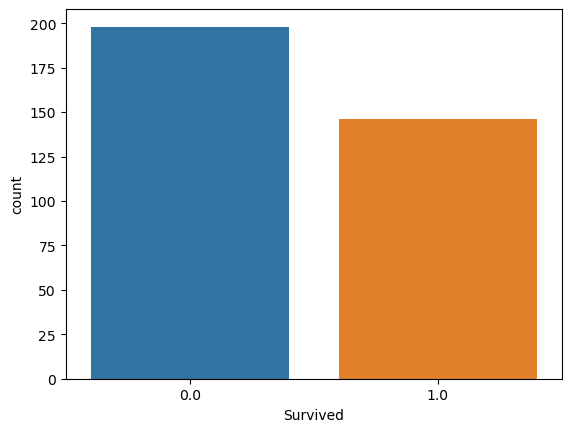

In [105]:
#Visualizing predicted values

sns.countplot(x='Survived', data=prediction_df)